In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Yes No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No No
4,9237-HQITU,NaN,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Yes Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Yes Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Yes Yes


In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    (df[i].str.strip())
    print(df[i].value_counts())

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
gender
Male      3508
Female    3435
Name: count, dtype: int64
Partner
No     3592
Yes    3351
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes               

In [ ]:
df[['PhoneService', 'PaperlessBilling']] = df['PhoneService,PaperlessBilling'].str.split(' ', expand=True)

df.drop(columns=['PhoneService,PaperlessBilling'], inplace=True)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['gender'].nunique()

2

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,100
SeniorCitizen,0
Partner,100
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.replace({'gender':{'Female':0,'Male':1}},inplace=True)
df.replace({'Partner':{'Yes':1,'No':0}},inplace=True)
df.replace({'Dependents':{'Yes':1,'No':0}},inplace=True)
df.replace({'PhoneService':{'Yes':1,'No':0}},inplace=True)
df.replace({'MultipleLines':{'Yes':2,'No':0 , 'No phone service':1}},inplace=True)
df.replace({'InternetService':{'Fiber optic':2,'DSL':1 , 'No':0}},inplace=True)
df.replace({'OnlineSecurity':{'Yes':1,'No':0 , 'No internet service':2}},inplace=True)
df.replace({'OnlineBackup':{'Yes':1,'No':0 , 'No internet service':2}},inplace=True)
df.replace({'DeviceProtection':{'Yes':1,'No':0 , 'No internet service':2}},inplace=True)
df.replace({'TechSupport':{'Yes':1,'No':0 , 'No internet service':2}},inplace=True)
df.replace({'StreamingTV':{'Yes':1,'No':0 , 'No internet service':2}},inplace=True)
df.replace({'StreamingMovies':{'Yes':1,'No':0 , 'No internet service':2}},inplace=True)
df.replace({'Contract':{'Month-to-month':0,'One year':1 , 'Two year':2}},inplace=True)
df.replace({'PaperlessBilling':{'Yes':1,'No':0}},inplace=True)
df.replace({'PaymentMethod':{'Electronic check':0,'Mailed check':1 , 'Bank transfer (automatic)':2,'Credit card (automatic)':3}},inplace=True)
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})


In [ ]:
mean_value = df['gender'].mean()
df['gender'].fillna(mean_value, inplace=True)
mean_value_2 = df['Partner'].mean()
df['Partner'].fillna(mean_value_2, inplace=True)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
dtypes=df.dtypes
dtypes

,0
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


In [ ]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [ ]:
df['gender'] = df['gender'].astype('int')
df['Partner'] = df['Partner'].astype('int')
df['Churn'] = df['Churn'].astype('int')
df['TotalCharges'] = df['TotalCharges'].astype('float')



In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    (df[i].str.strip())
    print(df[i].value_counts())

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64


In [ ]:
dtypes=df.dtypes
dtypes

,0
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,1,1,...,1,1,1,1,1,1,1,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,2,0,...,1,0,1,1,1,1,3,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,1,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,2,0,...,0,0,0,0,0,1,1,74.40,306.6,1


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,1,1,...,1,1,1,1,1,1,1,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,2,0,...,1,0,1,1,1,1,3,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,1,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,2,0,...,0,0,0,0,0,1,1,74.40,306.60,1


In [ ]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

<Axes: ylabel='TotalCharges'>

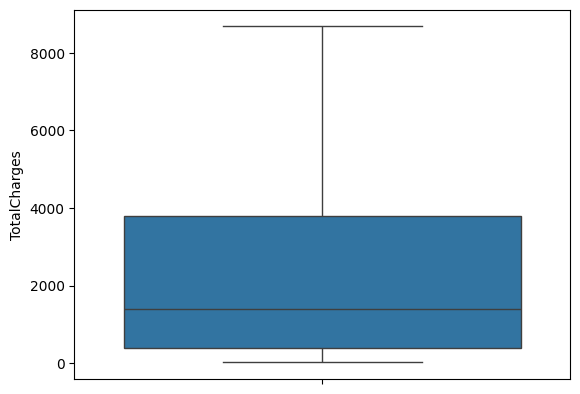

In [ ]:
sns.boxplot(df['TotalCharges'])

<Axes: ylabel='MonthlyCharges'>

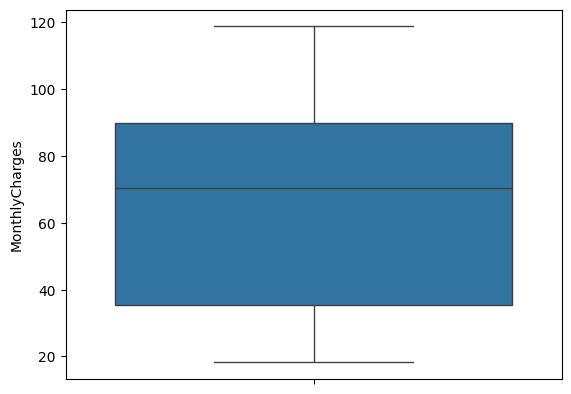

In [ ]:
sns.boxplot(df['MonthlyCharges'])

In [ ]:
x = df.drop(columns="churn")
y = df["churn"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
models = []

def results(model, name):
    global models

    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, zero_division=1)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)

    print(f"accuracy: {acc}\nf1-score: {f1}\nprecision: {pre}\nrecall: {rec}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

    models.append({
        'Model': name,
        'Accuracy': acc,
        'F1': f1,
        'Precision': pre,
        'Recall': rec
    })

In [ ]:
cols = ["tenure", "monthlycharges", "totalcharges"]
# scaler = MinMaxScaler()
scaler = StandardScaler()

x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

In [ ]:
log = LogisticRegression(random_state=42, max_iter=10000)
log.fit(x_train, y_train)

results(log, "Logistic Regression")

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

results(tree, "Decision Tree")

In [ ]:
random = RandomForestClassifier(random_state=42)
random.fit(x_train, y_train)
results(random, "RandomForest Before Optimization")

In [ ]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)

results(svc, "SVC")

In [ ]:
cm = df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})
plt.show()

In [ ]:
df.drop(columns=["gender", "phoneservice", "multiplelines"], inplace=True)

x = df.drop(columns="churn")
y = df["churn"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log', LogisticRegression(max_iter=10000))
])

param_grid = {
    'log__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'log__C': [0.01, 0.1, 1, 10, 100],
    'log__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'log__max_iter': [100, 200, 500, 1000]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
results(best_estimator, "Logistic with GridSearch")

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])

param_grid = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': [None, 10, 20, 30, 40, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
results(best_estimator, "Decision Tree with GridSearch")

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random', RandomForestClassifier())
])

param_grid = {
    'random__n_estimators': [100, 200, 300, 400, 500],
    'random__max_features': ['auto', 'sqrt', 'log2'],
    'random__max_depth': [None, 10, 20, 30, 40, 50],
    'random__min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
results(best_estimator, "RandomForest with GridSearch")

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
results(best_estimator, "SVC with GridSearch")

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_dim=x_train.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation= 'relu', kernel_regularizer = 'l1'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, verbose=1)

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype(int).reshape(-1)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

models.append({
        'Model': "Neural Network",
        'Accuracy': acc,
        'F1': f1,
        'Precision': pre,
        'Recall': rec
    })

print(f"accuracy: {acc}\nf1-score: {f1}\nprecision: {pre}\nrecall: {rec}")

plt.figure(figsize=(5, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

In [ ]:
# Results of all Models
results_df = pd.DataFrame(models)
results_df.T